In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
frame = pd.read_csv('wine.csv')
frame.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


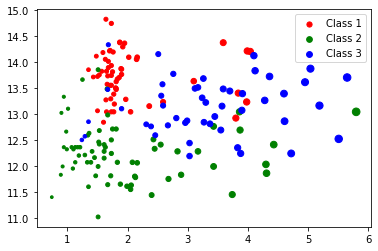

In [46]:
c = [frame[frame["Class"] == i] for i in range(1,4)]
colors = ['r', 'g', 'b']
for i, cl in enumerate(c):
    plt.scatter(y=cl["Alcohol"], x=cl["Malic acid"], s=cl["Malic acid"] * 10, c=colors[i], label="Class {}".format(i + 1))
plt.legend()
plt.show()

In [47]:
X = frame.drop("Class", axis=1)
y = frame["Class"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
predictions = knn.predict(X_test)
print("MeanSquare Error: {:.2f}".format(mean_squared_error(y_test, predictions)))
print("Mean Abs Error: {:.2f}".format(mean_absolute_error(y_test, predictions)))
print("Score: {:.2f}".format(knn.score(X_test, y_test)))

MeanSquare Error: 0.42
Mean Abs Error: 0.42
Score: 0.58


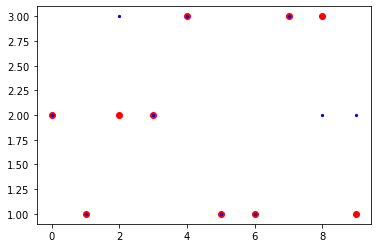

In [53]:
r = []
p = []
for i in range(10):
    s = frame.sample()
    rv = s["Class"].to_list()[0]
    r.append(rv)
    p.append(knn.predict(s.drop("Class", axis=1))[0])

plt.scatter(y=r, x=np.arange(10), c='r', label="Real")
plt.scatter(y=p, x=np.arange(10), c='b', s=5, label="Predictions")
plt.show()